## Project Overview

In today's digital age, e-commerce platforms face the challenge of analyzing vast amounts of customer feedback to understand product sentiment accurately. Understanding customer sentiment is crucial for businesses to make informed decisions about product improvements, marketing strategies, and customer satisfaction. However, manually analyzing thousands of product reviews is time-consuming and inefficient. Therefore,there is a need for an automated **sentiment analysis** solution to process and interpret these reviews efficiently.

## Project Objectives

The aim of this project is to develop a robust **sentiment analysis system** for e-commerce product reviews, specifically targeting the **Electronics category** on Amazon. By leveraging Data Science techniques, our objective is to build an end-to-end solution that can extract, preprocess, analyze, and visualize customer sentiment from textual reviews. This solution will provide valuable insights to our business stakeholders, empowering them to make data-driven decisions and enhance the overall customer experience.

#### Import Required Libraries

In [2]:
# Analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import joblib

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Harrison\Downloads\Team Brainiac dataset.csv")
                   
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


### Data Inspection and Cleaning

In [4]:
data.shape

(12000, 6)

The dataset contains 12,000 rows and 6 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Reviewer     11997 non-null  object
 1   Country      11997 non-null  object
 2   StarRatings  12000 non-null  int64 
 3   Subject      12000 non-null  object
 4   Review       11161 non-null  object
 5   Date_posted  12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


In [6]:
# Check the data type
data.dtypes

Reviewer       object
Country        object
StarRatings     int64
Subject        object
Review         object
Date_posted    object
dtype: object

In [7]:
# Check for duplicate
data.duplicated().sum()

0

The dataset has no duplicate

In [8]:
# Check the number unique values in each features
data.nunique()

Reviewer       11065
Country          147
StarRatings        5
Subject        11177
Review         11158
Date_posted     1372
dtype: int64

We can notice that there are 147 unique countries where the reviews came from

In [9]:
# Check for missing values
data.isnull().sum()

Reviewer         3
Country          3
StarRatings      0
Subject          0
Review         839
Date_posted      0
dtype: int64

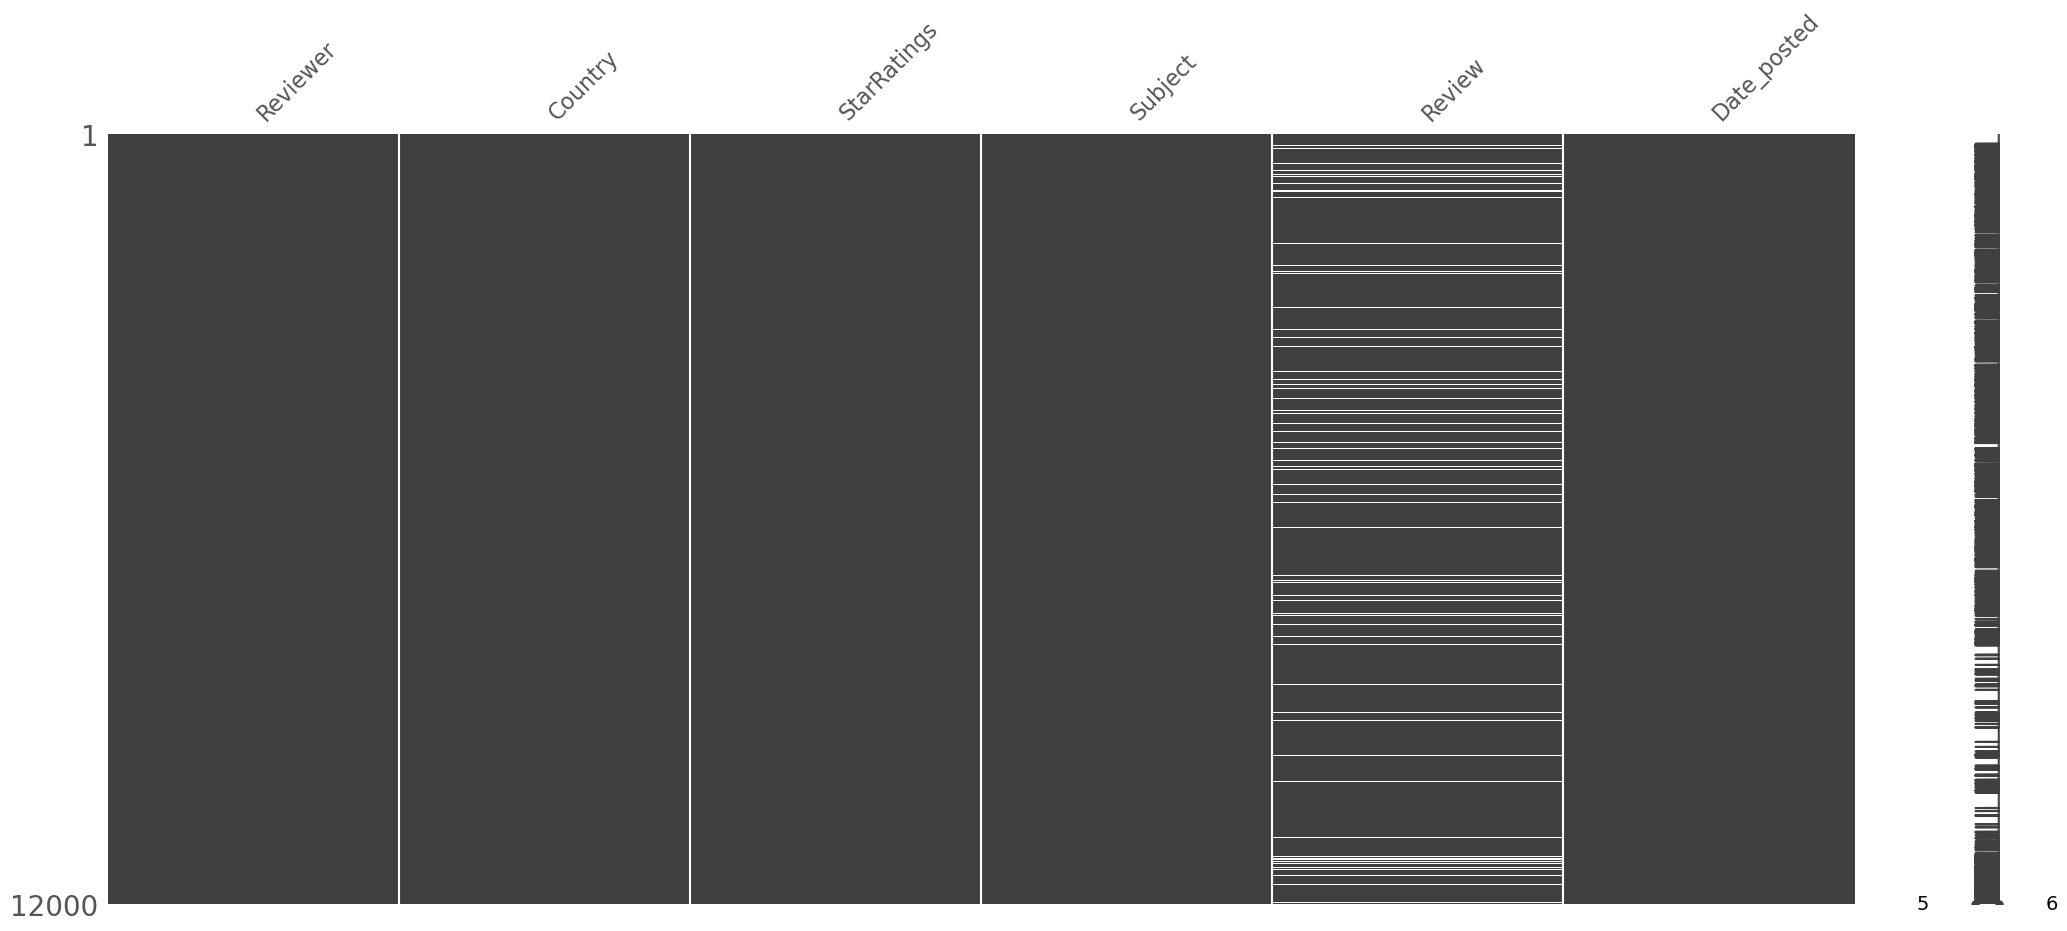

In [10]:
 # Visualizing the missing data
import missingno as msno

# Visualize nullity patterns
msno.matrix(data)

plt.show()

The dataset contains a small number of missing values in the 'Reviewer' and 'Country' columns and a substantial number in the 'Review' column. Despite this, we have decided to retain all data points, including those with missing information as potential insight could be derived from the columns

In [11]:
data.shape

(12000, 6)

In [14]:
# Save the cleaned data

data.to_csv('cleaned_data.csv', index=False)

The final dataset contains 12,000 rows and 6 columns

### Explortatory Data Analysis (EDA)

In [11]:
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


- **Analyzing the 'StarRatings' Column**

In [12]:
# Distinct values of 'StarRatings'
print(f"StarRatings Value Count: \n{data['StarRatings'].value_counts()}")

StarRatings Value Count: 
StarRatings
1    6418
5    4488
2     412
4     402
3     280
Name: count, dtype: int64


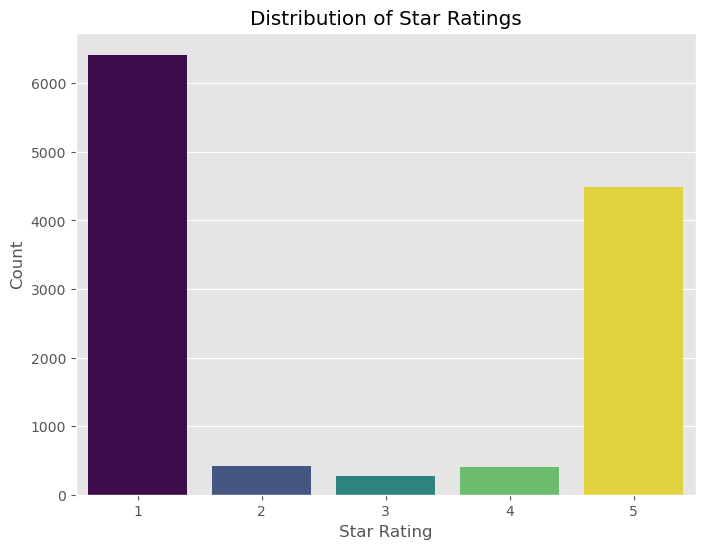

In [13]:
# Plot the distribution of star ratings with different colors
plt.figure(figsize=(8, 6))
sns.countplot(x='StarRatings', data=data, hue='StarRatings', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Remove the legend as it's redundant in this case
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


In [14]:
# Looking at the Percentage distribution of the 'StarRatings' column

print(f"Rating Value Count - Percentage Distribution: \n{round(data['StarRatings'].value_counts()/data.shape[0]*100,2)}")

Rating Value Count - Percentage Distribution: 
StarRatings
1    53.48
5    37.40
2     3.43
4     3.35
3     2.33
Name: count, dtype: float64


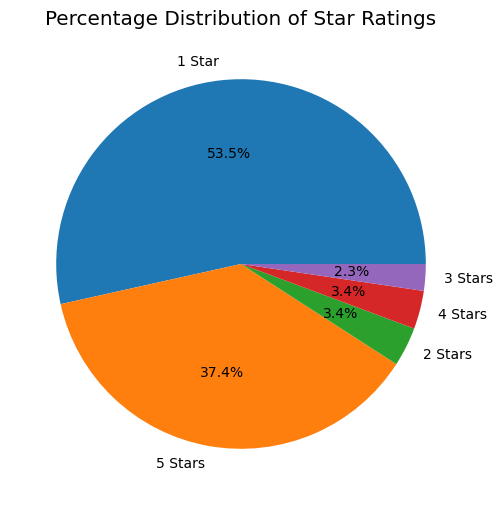

In [15]:
# Visualizing the Percentage Distribution of 'StarRatings'

ratings = ['1 Star', '5 Stars', '2 Stars', '4 Stars', '3 Stars']
percentages = [53.48, 37.40, 3.43, 3.35, 2.33]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=ratings, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Percentage Distribution of Star Ratings')
plt.show()

This is an imbalanced data, as can be seen.d sentences.

Because of data imbalance we will classify the StarRatings as either positive or negative.

Assumptions:
- if StarRatings is greater than or equal to 3, we will classify it as 'Positive'
- If StarRatings is less than 3, we will classify it as 'Negative'

In [16]:
# Creating a 'StarRatings_Sentiment' column to classify the sentiment of reviews based on the StarRatings

# Define the classification function
def classify_rating(StarRatings):
    if StarRatings >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Apply the classification
data['StarRatings_Sentiment'] = data['StarRatings'].apply(classify_rating)

data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024",Negative
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024",Negative


In [17]:
# Sentiment distribution
sentiment_counts = data['StarRatings_Sentiment'].value_counts()
print(sentiment_counts)

StarRatings_Sentiment
Negative    6830
Positive    5170
Name: count, dtype: int64


Base on our  assumptions, the data is a little bit balance

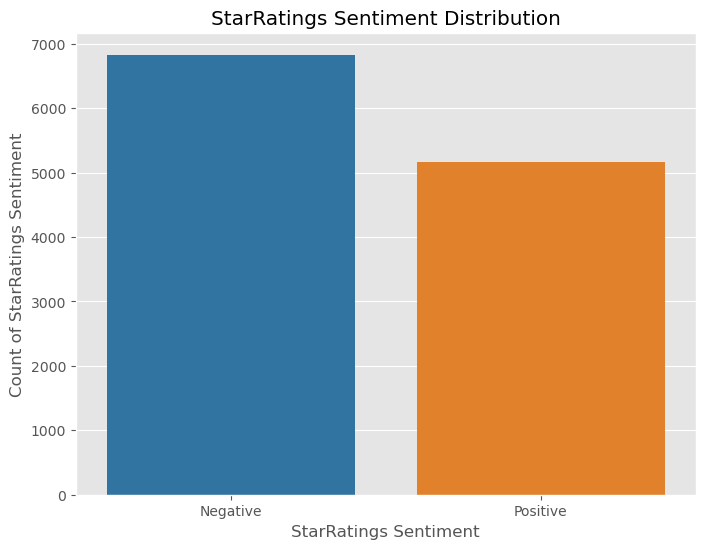

In [18]:
# Visualizing the Sentiment column
sentiment_counts = data['StarRatings_Sentiment'].value_counts()

# Get the colors from the tab10 color map
colors = plt.get_cmap('tab10').colors

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('StarRatings Sentiment Distribution')
plt.xlabel('StarRatings Sentiment')
plt.ylabel('Count of StarRatings Sentiment')
plt.xticks(rotation=0)
plt.show()


In [19]:
# Looking at the Percentage distribution of the 'Sentiment' column

print(f"StarRatings Sentiment Value Count - Percentage Distribution: \n{round(data['StarRatings_Sentiment'].value_counts()/data.shape[0]*100,2)}")

StarRatings Sentiment Value Count - Percentage Distribution: 
StarRatings_Sentiment
Negative    56.92
Positive    43.08
Name: count, dtype: float64


Sentiment distribution
- 56.92% reviews are negative
- 43.08% reviews are positive

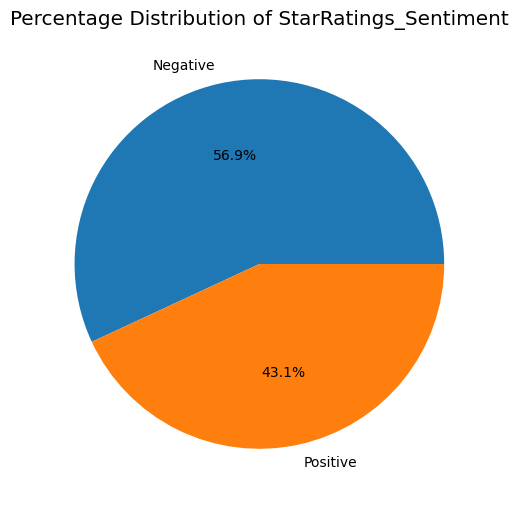

In [20]:
# Visualizing the Percentage Distribution of 'Sentiment'

# Data
sentiments = ['Negative', 'Positive']
percentages = [56.92, 43.08]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Percentage Distribution of StarRatings_Sentiment')
plt.show()

In [21]:
# StarRating Sentiment = Negative
data[data['StarRatings_Sentiment'] == 'Negative']['StarRatings'].value_counts()

StarRatings
1    6418
2     412
Name: count, dtype: int64

Based on our StarRatings categorisation, 6,830 reviews are negative

In [22]:
# StarRatings Sentiment = Positive
data[data['StarRatings_Sentiment'] == 'Positive']['StarRatings'].value_counts()

StarRatings
5    4488
4     402
3     280
Name: count, dtype: int64

5,170 reviews are positive based on our categorization

## Data Preprocessing
- Text Cleaning: Remove noise, special characters, and irrelevant information.
- Tokenization: Split text into tokens.

In [23]:
data.sample(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
8099,John,GB,1,Aliexpress and their fake dispute system,Bought a cheap item from Aliexpress and it nev...,"Thursday, May 19, 2022",Negative
7285,dj,BE,1,Such a bad experience that I had to share it here,"I had good experience with this shop, but not ...","Sunday, September 11, 2022",Negative
8047,Florin Bobi,GB,1,It is really concerning and…,It is really concerning and disappointing how ...,"Friday, June 3, 2022",Negative


- Text cleaning and Tokenization

In [24]:



import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text cleaning functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatization
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Comprehensive preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return tokens

# Apply preprocessing to the 'Review' column
data['cleaned_review'] = data['Review'].apply(preprocess_text)

data.head(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,"[amazon, easy, work, fulfill, order, via, rd, ..."
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,"[using, aliexpress, well, year, consistently, ..."
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive,"[good, customercentric, marketplace, neverthel..."


In [25]:
data['cleaned_review']

0        [amazon, easy, work, fulfill, order, via, rd, ...
1        [using, aliexpress, well, year, consistently, ...
2        [good, customercentric, marketplace, neverthel...
3        [purchased, android, tesla, style, radio, inst...
4        [absolute, con, job, dont, waste, money, scamm...
                               ...                        
11995                             [im, happy, come, thank]
11996                                 [excellent, quality]
11997    [ordered, item, aliexpress, two, seller, cance...
11998    [great, platform, business, vendor, would, nev...
11999    [satisfied, aliexpress, recently, however, cha...
Name: cleaned_review, Length: 12000, dtype: object

- Creating a Word Cloud of the most frequent words in all reviews

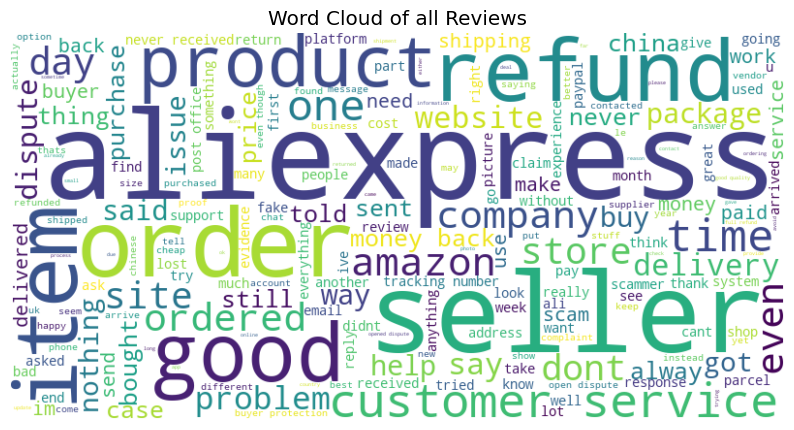

In [26]:
# Combine all reviews into a single string
all_reviews = ' '.join([' '.join(tokens) for tokens in data['cleaned_review']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all Reviews')
plt.show()

The word cloud displays the frequently occurring words in the reviews in a visual format, clearly showing their importance and prevalence in the reviews. This allows for observation of trends and features in the text data.

- Plotting the most frequent words

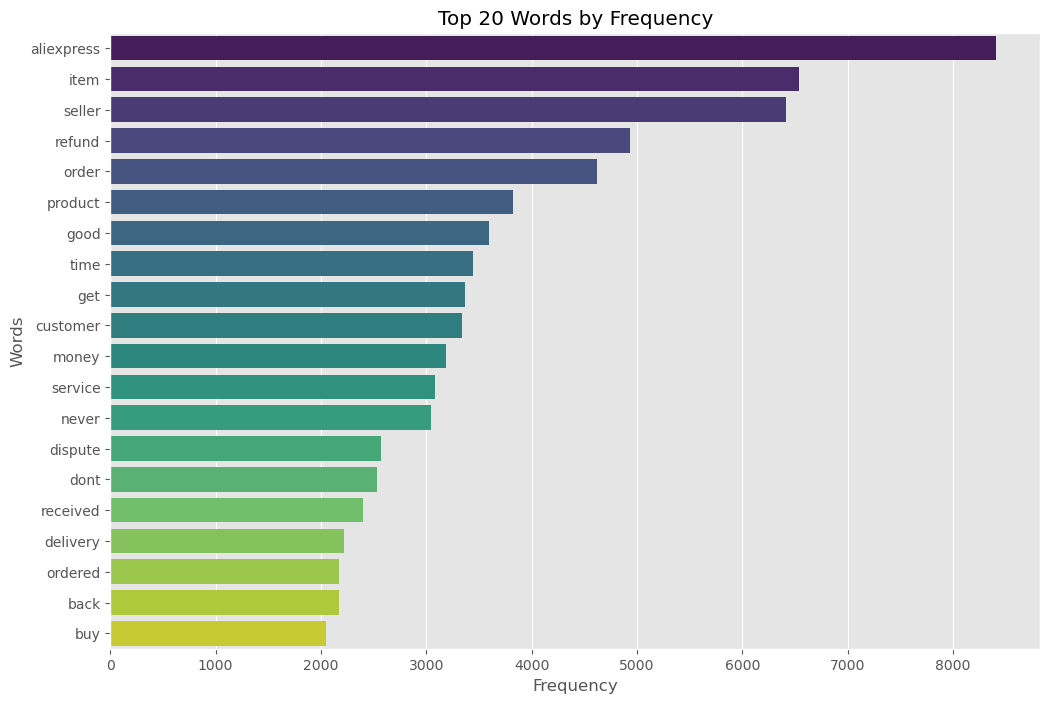

In [27]:
# Combine tokens back into strings for each review
data['cleaned_review'] = data['cleaned_review'].apply(lambda tokens: ' '.join(tokens))

# Calculate Term Frequency using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_review'])

# Sum the term frequencies across all documents
term_frequencies = X.sum(axis=0).A1

# Create a DataFrame of terms and their frequencies
terms = vectorizer.get_feature_names_out()
term_freq_data = pd.DataFrame({'term': terms, 'frequency': term_frequencies})

# Sort the DataFrame by frequency
term_freq_data = term_freq_data.sort_values(by='frequency', ascending=False)

# Plot the top 20 terms
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='term', data=term_freq_data.head(20), palette='viridis')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

This shows the most frequent words in the review, with 'aliexpress' topping the chart followed by the word 'item'

- Removing Noise

Rarely used words, often referred to as low-frequency words, can sometimes be noise in the data and may not contribute significantly to the sentiment analysis. Removing these words can help simplify the model and potentially improve its performance.

In [28]:
# Eliminating rarely used words, often referred to as low-frequency words
freq_words = pd.Series(" ".join(data['cleaned_review']).split()).value_counts()

freq_words

aliexpress      8406
item            6535
seller          6413
refund          4935
order           4615
                ... 
alijoke            1
fraudstersmy       1
arrivedalis        1
exemplory          1
favoring           1
Name: count, Length: 19855, dtype: int64

In [29]:
# Dropping words that appear once in the review
drops = freq_words[freq_words <= 1]
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [30]:
freq_words_1 = pd.Series(' '.join(data['cleaned_review']).split()).value_counts()

freq_words_1

aliexpress     8406
item           6535
seller         6413
refund         4935
order          4615
               ... 
insensitive       2
accessed          2
upped             2
naira             2
exsg              2
Name: count, Length: 8829, dtype: int64

In [31]:
# Viewing the reviews
data['cleaned_review'].tail(1000)

11000    ive purchased lot company use reasonable thing...
11001    good place buy stuff far quite reliable really...
11002                    best shop world buy need recomend
11003    help product work tried contact seller help tr...
11004    year worst used kind good refunded money got d...
                               ...                        
11995                                  im happy come thank
11996                                    excellent quality
11997    ordered item aliexpress two seller cancelled s...
11998    great platform business vendor would never abl...
11999    satisfied aliexpress recently however changed ...
Name: cleaned_review, Length: 1000, dtype: object

### Feature Engineering:

- Bag of Words Vectors: Convert text data into numerical feature vectors.
- TF-IDF: Transform text data into TF-IDF matrices.

In [32]:
data.head(2)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,amazon easy work fulfill order via rd party co...
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,using aliexpress well year consistently impres...


In [33]:
# #Instantiate BoW Vectors
bow_vectorizer = CountVectorizer()
x_bow = bow_vectorizer.fit_transform(data['cleaned_review'])

In [34]:
# Verify
x_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
# #Instantiate TF-IDF
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])

In [37]:
x_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model Development:
- Vader Model

In [38]:
# Instantiate Vader sentiment analyser
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each review
data['vader_scores'] = data['cleaned_review'].apply(sia.polarity_scores)

# Extract compound score
data['compound'] = data['vader_scores'].apply(lambda x: x['compound'])

# Categorize sentiment based on compound score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['vader_sentiment'] = data['compound'].apply(categorize_sentiment)

In [41]:
# Verify
data.head(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review,vader_scores,compound,vader_sentiment
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,amazon easy work fulfill order via rd party co...,"{'neg': 0.031, 'neu': 0.566, 'pos': 0.402, 'co...",0.9432,Positive
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,using aliexpress well year consistently impres...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.9689,Positive
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive,good marketplace nevertheless need think makin...,"{'neg': 0.161, 'neu': 0.566, 'pos': 0.273, 'co...",0.6705,Positive


In [42]:
data['vader_sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
11995    Positive
11996    Positive
11997    Negative
11998    Positive
11999    Negative
Name: vader_sentiment, Length: 12000, dtype: object

vader_sentiment
Positive    5831
Negative    4594
Neutral     1575
Name: count, dtype: int64


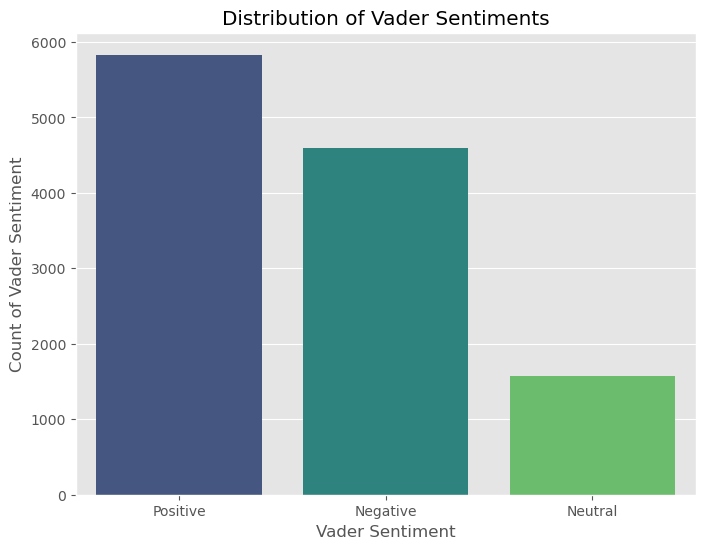

In [43]:
# Analyze the distribution of vader sentiments
sentiment_counts = data['vader_sentiment'].value_counts()
print(sentiment_counts)

# Plot the vader sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=data, palette='viridis')
plt.title('Distribution of Vader Sentiments')
plt.xlabel('Vader Sentiment')
plt.ylabel('Count of Vader Sentiment')
plt.show()


In [44]:
# Looking at the Percentage distribution of the 'vader_Sentiment'
print(f"Vader_ Sentiment Value Count - Percentage Distribution: \n{round(data['vader_sentiment'].value_counts()/data.shape[0]*100,2)}")


Vader_ Sentiment Value Count - Percentage Distribution: 
vader_sentiment
Positive    48.59
Negative    38.28
Neutral     13.12
Name: count, dtype: float64


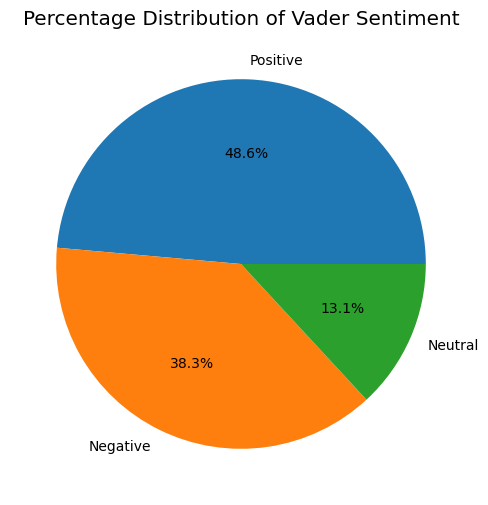

In [45]:
# Visualizing the Percentage Distribution of 'Sentiment'

# Data
vader_sentiment = ['Positive', 'Negative', 'Neutral']
percentages = [48.59, 38.28, 13.12]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=vader_sentiment, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Percentage Distribution of Vader Sentiment')
plt.show()

We can observed that 48.6% of the vader_sentiments are psoitive, 38.3% are negative and 13.1% are neutral

- #### Naive Bayes Model

In [46]:
data.sample(2)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review,vader_scores,compound,vader_sentiment
7061,E Moran,GB,1,Terrible,Terrible - a long wait for the item to arrive ...,"Tuesday, October 4, 2022",Negative,terrible long wait item arrive ordered avoid,"{'neg': 0.515, 'neu': 0.485, 'pos': 0.0, 'comp...",-0.6486,Negative
4355,Victor U Alarcón,ES,5,good yes very good buying,NaN,"Tuesday, July 4, 2023",Positive,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral


#### Import Libraries

In [ ]:
# Analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import joblib

In [47]:
# Copy the data
data = pd.read_csv("cleaned_data.csv")

#### Data Preprocessing

In [ ]:

import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text cleaning functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatization
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Comprehensive preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return tokens

# Apply preprocessing to the 'Review' column
data['cleaned_review'] = data['Review'].apply(preprocess_text)

data.head(3)

In [48]:
# Using the most important feature for our model building
df = df[['StarRatings_Sentiment','cleaned_review']]
df.head(2)

,StarRatings_Sentiment,cleaned_review
0,Positive,amazon easy work fulfill order via rd party co...
1,Positive,using aliexpress well year consistently impres...


In [49]:
# Instantiating the dependent and independent variables

X = df["cleaned_review"] # independent variable
y = df["StarRatings_Sentiment"] # dependent variable


In [50]:
# Encoding the dependent variable (StarRatings_Sentiment)
df["StarRatings_Sentiment"] = LabelEncoder().fit_transform(df["StarRatings_Sentiment"])
df["StarRatings_Sentiment"].sample(5)

5935    0
8897    0
9312    0
4849    0
6522    1
Name: StarRatings_Sentiment, dtype: int32

In [51]:
df.shape

(12000, 2)

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2, random_state=42)


In [53]:
X_train.shape

(9600,)

In [54]:
X_test.shape

(2400,)

- Vectorize the Training Data Using TF-IDF

In [55]:
# Choose our vectorizer (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the text data using TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) # Transform using learned vocabulary

- Train the model

In [56]:
# Train a Naive Bayes model using TF-IDF
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

- Model Evaluation

In [59]:
# Make predictions on the test set
mnb_y_pred = mnb_model.predict(X_test_tfidf)

# Evaluation metrics
accuracy = accuracy_score(y_test, mnb_y_pred)
precision = precision_score(y_test, mnb_y_pred, average='weighted')
f1 = f1_score(y_test, mnb_y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, mnb_y_pred))

Accuracy: 0.8446
Precision: 0.8644
F1-Score: 0.8389

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.98      0.88      1368
    Positive       0.95      0.67      0.79      1032

    accuracy                           0.84      2400
   macro avg       0.88      0.82      0.83      2400
weighted avg       0.86      0.84      0.84      2400



- #### Support Vector Classifier Model

- Train the Model

In [60]:
# Fit the SVC to train the data
from sklearn.svm import SVC

svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

- Model Evaluation

In [61]:
# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test_tfidf)

# Evaluation metrics
accuracy = accuracy_score(y_test, svc_y_pred)
precision = precision_score(y_test, svc_y_pred, average='weighted')
f1 = f1_score(y_test, svc_y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.9196
Precision: 0.9202
F1-Score: 0.9197

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1368
    Positive       0.89      0.92      0.91      1032

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



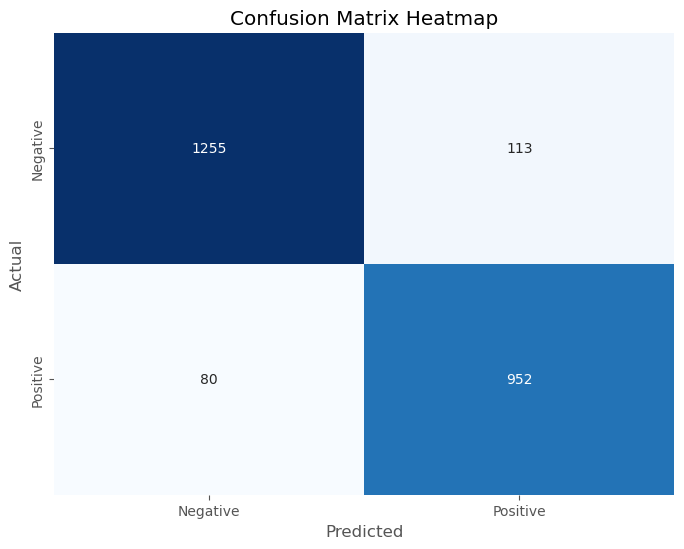

In [65]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, svc_y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


#### Logistic Regression Model

- Train the Model

In [62]:
# Define and train the Logistic Regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train_tfidf, y_train)


LogisticRegression()

- Model Evaluation

In [64]:
# Make predictions on the test set
y_pred_logistic = model_logistic.predict(X_test_tfidf)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, average='weighted')
f1 = f1_score(y_test, y_pred_logistic, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

Accuracy: 0.9133
Precision: 0.9137
F1-Score: 0.9134

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      1368
    Positive       0.89      0.91      0.90      1032

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



#### Hyperparameter Tuning of SVC Model for Improved Performance

In [66]:
df.sample(2)

,StarRatings_Sentiment,cleaned_review
10396,1,favorite site online shopping wide variety mer...
453,0,purchased pair kpa high pressure mini air pump...


In [67]:
from sklearn.pipeline import Pipeline

# Define a pipeline with TF-IDF vectorization and SVC
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Use TfidfVectorizer for TF-IDF
    ('classifier', SVC(kernel='linear'))  # Linear kernel for now
])

# Define the hyperparameter space for grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]  # Range of C values for regularization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
svc_best_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set using the original X_test
predicted_y = svc_best_model.predict(X_test)

# Calculate accuracy, F1-score, and precision
accuracy_tuned = accuracy_score(y_test, predicted_y)
f1_score_tuned = f1_score(y_test, predicted_y, average='weighted')
precision_tuned = precision_score(y_test, predicted_y, average='weighted')

# Print the improved accuracy, F1-score, and precision
print("Improved Accuracy:", accuracy_tuned)
print("Improved F1 Score (Weighted):", f1_score_tuned)
print("Improved Precision (Weighted):", precision_tuned)

# Generate classification report for the tuned model
print("\nClassification Report:")
print(classification_report(y_test, predicted_y))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Improved Accuracy: 0.9195833333333333
Improved F1 Score (Weighted): 0.9197251927466806
Improved Precision (Weighted): 0.9202182834836734

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1368
    Positive       0.89      0.92      0.91      1032

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



In [68]:
# Randomly selecting comments from the data and asking them to the model

random_comment = pd.Series(df["cleaned_review"].sample().values)

# Ensure you use the already fitted vectorizer to transform the new comment
new_comment = tfidf_vectorizer.transform(random_comment)

# Predict the sentiment using the trained SVC model
pred = svc_model.predict(new_comment)

print(f"Review: {random_comment[0]} \nPrediction: {pred[0]}")


Review: product arrived day earlier expected pattern size specified correct thank much 
Prediction: Positive


#### Conclusion
- Support Vector Classifier (SVC) appears to be the best-performing model based on accuracy and weighted F1 scores across all sentiment classes, even after tuning. Its ability to effectively classify sentiment across all classes contributes to its superior performance.
- Logistic Regression also performs well, particularly in classifying the positive sentiment, but it lags slightly behind SVC in overall precision

Therefore, the Support Vector Classifier (SVC) can be considered the best-performing model among the all models for sentiment analysis based on the provided metrics and will be our saved model.

- Save the Best Model

In [69]:
# Save the model to a file
joblib.dump(svc_best_model, 'svc_best_model.joblib')

print("Model saved successfully.")


Model saved successfully.


- Save the Vectorizer(TF-IDF)

In [70]:
# Save the fitted vectorizer using joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("TF-IDF Vectorizer saved successfully!")

TF-IDF Vectorizer saved successfully!


### Model Deployment:
- Set up pipelines for text cleaning, feature engineering, and inference.
- Deploy the trained model:
  - Locally using a Flask application.
  - Via a cloud service (e.g., Streamlit)

##### Pipeline for Text Cleaning and Feature Engineering and Inference:
- We will create a pipeline for text cleaning, feature engineering, and inference

- Define the Text Preprocessing Functions and Class

In [71]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Define text preprocessing functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return ' '.join(tokens)

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [preprocess_text(text) for text in X]


In [72]:
# Initialize the TextPreprocessor
text_preprocessor = TextPreprocessor()

# Save the TextPreprocessor
joblib_file = "text_preprocessor.joblib"
joblib.dump(text_preprocessor, joblib_file)

['text_preprocessor.joblib']

- Combine for Inference:

In [75]:
# Define the label mapping
label_mapping = {0: "Negative", 1: "Positive"}

# Function to make predictions
def predict(texts):
    loaded_pipeline = joblib.load('svc_pipeline_with_preprocessing.joblib')
    numerical_preds = loaded_pipeline.predict(texts)
    text_preds = [label_mapping[pred] for pred in numerical_preds]
    return text_preds

# Example usage
example_text = ['Scam company']
prediction = predict(example_text)
print(f"Review: {example_text[0]} \nPrediction: {prediction[0]}")

# Predict a random comment from the DataFrame
random_comment = df["cleaned_review"].sample(1).values[0]
random_prediction = predict([random_comment])
print(f"Review: {random_comment} \nPrediction: {random_prediction[0]}")


Review: Scam company 
Prediction: Negative
Review: part come within time plus well packing made number order time problem pleased service 
Prediction: Positive


In [74]:
print(pipeline.steps)


[('preprocessor', TextPreprocessor()), ('vectorizer', TfidfVectorizer()), ('classifier', SVC(kernel='linear'))]


- #### Deploy the trained model:
  - Locally using a Flask application.
  - Via a cloud service (e.g., Streamlit)

##### Cloud Deployment Using Streamlit Web Application.

In [ ]:
import streamlit as st
import joblib
from preprocess import preprocess_text  # Import the preprocessing function

# Load the model and TF-IDF vectorizer
model = joblib.load('svc_best_model.joblib')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Custom header
st.markdown("""
    <style>
    .header {
        font-size: 30px;
        font-weight: bold;
        color: #8d0801;
        text-align: center;
        margin-bottom: 10px;
        background-image: url('https://drive.google.com/uc?export=view&id=1CLQWMR_hqlXmJGRfzcdaX0HOi4dV5Gzh'); 
        background-size: cover;
        padding: 50px;
    }
    </style>
    <div class="header">
        Sentiment Analysis on Product Reviews
    </div>
    """, unsafe_allow_html=True)

# Add a logo
st.image("C:/Users/Harrison/Desktop/internship_project/images/sa.jpg", width=700)

review = st.text_area("Enter a product review:")

if st.button("Predict Sentiment"):
    if review:
        with st.spinner('Processing...'):
            # Preprocess the input review
            preprocessed_review = preprocess_text(review)
            preprocessed_review_str = ' '.join(preprocessed_review)
            
            # Vectorize the preprocessed review
            vectorized_review = tfidf_vectorizer.transform([preprocessed_review_str])
            
            # Predict the sentiment
            prediction = model.predict(vectorized_review)
            
            # Display the result
            if prediction == 1:
                st.success("The review is positive!")
            else:
                st.error("The review is negative!")
    else:
        st.error("Please enter a review.")

# Custom footer with social media links
st.markdown("""
    <style>
    .footer {
        position: fixed;
        left: 0;
        bottom: 0;
        width: 100%;
        background-color: #4CAF50;
        color: white;
        text-align: center;
        padding: 10px;
    }
    .footer a {
        color: white;
        text-decoration: none;
        margin: 0 10px;
    }
    </style>
    <div class="footer">
        Developed by Team Brainiac - ©2024
        <br>
        <a href="https://x.com/G_Harrison27" target="_blank">Twitter</a>
        <a href="https://www.linkedin.com/in/gogo-harrison/" target="_blank">LinkedIn</a>
        <a href="https://github.com/GogoHarry" target="_blank">GitHub</a>
    </div>
    """, unsafe_allow_html=True)
